# keras minist


In [1]:

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17505582618575792350
xla_global_id: -1
]


Precarga de los datos en Keras

In [2]:
from keras.datasets import mnist

# obtenemos los datos para train y test 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 13s 1us/step


In [3]:
print(x_train.ndim) 


3


In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
print(x_train.dtype)

uint8


In [6]:
len (y_train)

60000

1


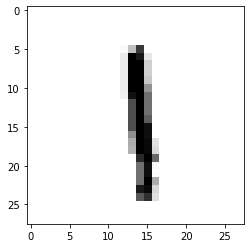

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)
print(y_train[8])

In [8]:
import numpy
from numpy import linalg
numpy.set_printoptions(precision=2, suppress=True, linewidth=120)
print(numpy.matrix(x_train[8]))



[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5  63 197   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 230  24   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 255  48   0   0   0   

4


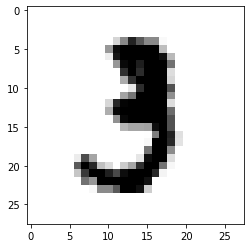

In [9]:
plt.imshow(x_train[10], cmap=plt.cm.binary)
print(y_train[9])

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255


In [11]:
print(numpy.matrix(x_train[8]))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.25 0.77 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.08 1.   0.9  0.09 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]

In [12]:
from keras.utils import to_categorical

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Definición del modelo

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation


import matplotlib.pyplot as plt


def Show_History(History):
    # summarize history for accuracy
    plt.plot(History.history['accuracy'])
    plt.plot(History.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    
    
    
model = Sequential()
model.add(Dense(20, activation='sigmoid', input_dim=784))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


Aprendizaje, entrenamiento y evaluación

In [ ]:
batch_size = 32
num_classes = 10
epochs=10

model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics = ['accuracy'])

history=model.fit(x_train, y_train,batch_size=10,epochs=epochs,verbose=1,validation_data=(x_test,y_test))


#test_loss, test_acc = model.evaluate(x_test, y_test)

#print('Test loss:', test_loss)
#print('Test accuracy:', test_acc)

Epoch 1/10
6000/6000 [==============================] - 9s 1ms/step - loss: 1.1317 - accuracy: 0.7465 - val_loss: 0.6110 - val_accuracy: 0.8654
Epoch 2/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.5064 - accuracy: 0.8796 - val_loss: 0.4178 - val_accuracy: 0.8952
Epoch 3/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.3934 - accuracy: 0.8972 - val_loss: 0.3529 - val_accuracy: 0.9065
Epoch 4/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.3458 - accuracy: 0.9062 - val_loss: 0.3189 - val_accuracy: 0.9118
Epoch 5/10
5971/6000 [============================>.] - ETA: 0s - loss: 0.3174 - accuracy: 0.9122

In [ ]:
Show_History(history)

Predicciones

In [85]:
predictions = model.predict(x_test)

In [86]:
import numpy as np
np.sum(predictions[11])

1.0

In [87]:
np.argmax(predictions[11])

6